## The aim of this notebook is to clean airbnb raw data.
### 1) Check duplicates, outliers.
### 2) Further filtering if required.
### 3) Variable class convertion to  following calculations.
### 4) Creation of  a summary data frame broken down by districts for visualization purposes. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%cd ~/Master-IV/PROYECTO_FM/

/home/dsc/Master-IV/PROYECTO_FM


In [86]:
aib = pd.read_csv('aib.csv', sep='\t')

In [87]:
aib.shape

(10231, 96)

In [135]:
# DUPLICATES
aib.duplicated().sum()

0

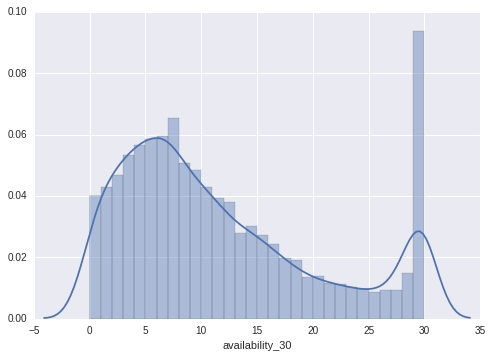

In [88]:
# OUTLIERS
sns.distplot(aib.availability_30)
sns.plt.show()

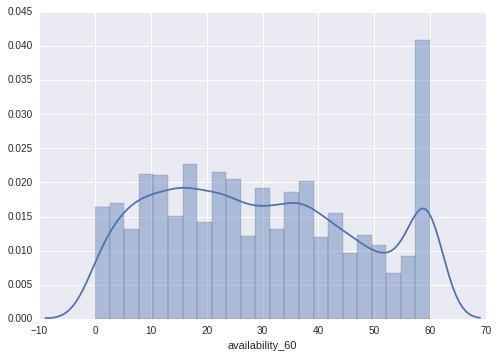

In [89]:

sns.distplot(aib.availability_60)
sns.plt.show()

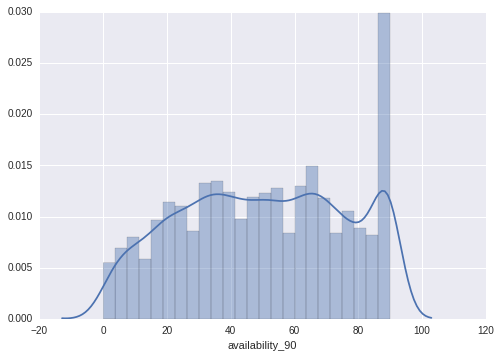

In [130]:

sns.distplot(aib.availability_90)
sns.plt.show()

In [49]:
# Full occupancy during three or two  months is extremly rare so additional filtering is necessary
ai9 = aib[(aib.availability_90==0)]
ai9[['id','price','neighbourhood_cleansed','number_of_reviews','reviews_per_month','host_since','last_review']]

,id,price,neighbourhood_cleansed,number_of_reviews,reviews_per_month,host_since,last_review
187,10064795,158.6999,Palacio,65,4.28,2015-12-18,2017-02-14
193,3113226,63.9060,Palacio,53,1.59,2014-05-21,2017-01-10
451,5499969,37.2785,Palacio,47,1.89,2015-02-28,2017-01-30
454,5860795,15.9765,Palacio,56,2.41,2014-05-05,2017-02-19
509,11078225,47.9295,Palacio,57,4.02,2015-09-15,2017-02-05
521,4748729,63.9060,Palacio,58,2.10,2012-04-15,2016-06-05
710,4196358,85.2080,Palacio,46,1.50,2014-01-20,2017-03-13
1042,4138837,58.5805,Embajadores,71,2.31,2014-09-18,2017-01-13
1111,268275,76.6872,Embajadores,42,0.66,2011-11-14,2017-01-22
1143,4755562,53.2550,Embajadores,48,1.81,2014-12-06,2017-03-26


In [90]:
# There are still many inactive listings. Aboveall those with no availability in 90 days and last review in 2016
# We get rid of those listings
# High percentage of listings show high occupancy but not full. Maybe this is due to the season,hence
# availability_90 is not a reliable variable
aib = aib.drop(aib[(aib.availability_90==0)&(aib.last_review<'2017-01-01')].index)
aib.shape

(10202, 96)

In [83]:
# Same with 60 days
aib10 = aib[(aib.availability_60==0)]
aib10[['id','availability_30','neighbourhood_group_cleansed','number_of_reviews','reviews_per_month','room_type','host_since','last_review']]

,id,availability_30,neighbourhood_group_cleansed,number_of_reviews,reviews_per_month,room_type,host_since,last_review
17,6617552,0,Centro,51,2.38,Private room,2015-05-31,2017-01-09
187,10064795,0,Centro,65,4.28,Entire home/apt,2015-12-18,2017-02-14
193,3113226,0,Centro,53,1.59,Entire home/apt,2014-05-21,2017-01-10
233,761015,0,Centro,40,0.77,Entire home/apt,2012-06-18,2017-01-01
282,5974127,0,Centro,92,3.91,Private room,2015-04-11,2017-02-27
397,9089327,0,Centro,40,2.29,Entire home/apt,2015-10-25,2017-02-27
451,5499969,0,Centro,47,1.89,Private room,2015-02-28,2017-01-30
454,5860795,0,Centro,56,2.41,Private room,2014-05-05,2017-02-19
465,1765529,0,Centro,40,1.09,Entire home/apt,2013-10-07,2017-03-24
509,11078225,0,Centro,57,4.02,Entire home/apt,2015-09-15,2017-02-05


In [91]:
# Manual verification of previous query we reveals that majority of listings do not exist anymore or are inactive.
# Therefore we remove all properties NOT located in the city center showing availability_30 and availability_60 equal to 0.

aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Arganzuela')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Tetuán')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Chamartín')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Retiro')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='San Blas - Canillejas')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Moratalaz')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Barajas')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Moncloa - Aravaca')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Latina')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Fuencarral - El Pardo')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Carabanchel')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Usera')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Puente de Vallecas')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Ciudad Lineal')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Hortaleza')].index)
aib = aib.drop(aib[(aib.availability_30==0)&(aib.availability_60==0)&(aib.neighbourhood_group_cleansed=='Villaverde')].index)



In [92]:
aib.shape

(10120, 96)

In [93]:
## Class Conversion
# Change 'price' to numeric type variable in order to perform calculations 
import re
aib['price']= aib['price'].str.replace('$','')
aib['price']= aib['price'].str.replace(',','')
aib['price'] = aib.price.astype(float)


In [94]:
aib['weekly_price']= aib['weekly_price'].str.replace('$','')
aib['weekly_price']= aib['weekly_price'].str.replace(',','')
aib['weekly_price'] = aib.weekly_price.astype(float)

In [95]:
aib['cleaning_fee']= aib['cleaning_fee'].str.replace('$','')
aib['claning_fee']= aib['cleaning_fee'].str.replace(',','')
aib['cleaning_fee'] = aib.cleaning_fee.astype(float)

In [96]:
aib['security_deposit']= aib['security_deposit'].str.replace('$','')
aib['security_deposit']= aib['security_deposit'].str.replace(',','')
aib['security_deposit'] = aib.security_deposit.astype(float)

In [97]:
# Change prices to EUR.
# EURUSD exchange rate as of 4th april 2017: 1.0651
# https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html
aib['price'] = aib.price * 1.0651
aib['weekly_price'] = aib.weekly_price / 1.0651
aib['cleaning_fee'] = aib.cleaning_fee / 1.0651
aib['security_deposit'] = aib.security_deposit/ 1.0651

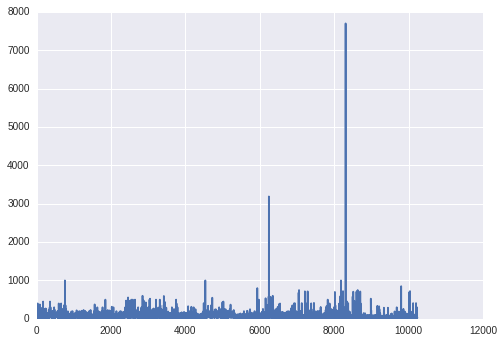

In [12]:
plt.plot(aib.price)
sns.plt.show()

In [18]:
# Search of outliers by neighbourhood and price
aibMed = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).price.agg(['max','min','mean','median'])

aibMed.sort_values(by='max',ascending=False)


max  \
neighbourhood_group_cleansed neighbourhood_cleansed      room_type                    
Moncloa - Aravaca            Argüelles                   Private room     8201.2700   
Salamanca                    Recoletos                   Entire home/apt  3396.6039   
Centro                       Universidad                 Entire home/apt  1065.1000   
                             Palacio                     Entire home/apt  1065.1000   
Chamberí                     Rios Rosas                  Private room     1065.1000   
Hortaleza                    Palomas                     Entire home/apt   905.3350   
Retiro                       Pacífico                    Entire home/apt   852.0800   
Chamartín                    Hispanoamérica              Entire home/apt   798.8250   
Moncloa - Aravaca            Ciudad Universitaria        Entire home/apt   798.8250   
Fuencarral - El Pardo        Peñagrande                  Private room      769.0022   
Villa de Vallecas            Casco Histórico de Vallecas Private room      769.0022   
Tetuán                       Bellas Vistas               Private room      762.6116   
Moncloa - Aravaca            Ciudad Universitaria        Private room      762.6116   
Tetuán                       Cuatro Caminos              Private room      761.5465   
Moncloa - Aravaca            Aravaca                     Private room      758.3512   
Fuencarral - El Pardo        Valverde                    Private room      753.0257   
                             El Goloso                   Private room      751.9606   
Chamberí                     Almagro                     Entire home/apt   745.5700   
Villaverde                   Los Angeles                 Private room      733.8539   
Chamartín                    Hispanoamérica              Private room      724.2680   
Moncloa - Aravaca            El Plantío                  Private room      692.3150   
Centro                       Cortes                      Private room      639.0600   
                             Justicia                    Entire home/apt   633.7345   
                             Cortes                      Entire home/apt   592.1956   
                             Sol                         Entire home/apt   585.8050   
Retiro                       Jerónimos                   Entire home/apt   570.8936   
Carabanchel                  San Isidro                  Entire home/apt   559.1775   
Centro                       Embajadores                 Entire home/apt   532.5500   
Chamberí                     Trafalgar                   Entire home/apt   532.5500   
Retiro                       Pacífico                    Private room      532.5500   
...                                                                             ...   
Usera                        Zofío                       Private room       26.6275   
Arganzuela                   Delicias                    Shared room        26.6275   
                             Chopera                     Shared room        24.4973   
Salamanca                    Guindalera                  Shared room        24.4973   
Villaverde                   San Cristobal               Private room       24.4973   
Hortaleza                    Valdefuentes                Shared room        23.4322   
Latina                       Cuatro Vientos              Private room       23.4322   
Villaverde                   San Cristobal               Shared room        21.3020   
Chamartín                    Nueva España                Shared room        21.3020   
Ciudad Lineal                Quintana                    Shared room        21.3020   
Tetuán                       Valdeacederas               Shared room        21.3020   
Fuencarral - El Pardo        Peñagrande                  Shared room        21.3020   
Puente de Vallecas           Entrevías                   Shared room        21.3020   
San Blas - Canillejas        Hellín                      Private room       21

In [ ]:
# OUTLIERS
# Further investigation/filtering is required since maximum prices do not make sense in several neighbourhoods
#(ie Argüelles)
# We manually check those areas with with widest variance (Max_Price - Average_Price)

## ARGÛELLES
aib[(aib.neighbourhood_cleansed=='Argüelles')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)

In [98]:
# The 8201 eur room is a  mistake since the listing is no longer on the website. Removed
aib = aib.drop(aib[aib.id==1250842].index)

In [46]:
# Recoletos
aib[(aib.neighbourhood_cleansed=='Recoletos')&(aib.room_type=='Entire home/apt')].sort_values(by='price',ascending=False)



,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
6241,8027,2744574,https://www.airbnb.com/rooms/2744574,20170407214119,2017-04-08,Mansion with royal garden,This mansion has been a family home for genera...,NaN,This mansion has been a family home for genera...,none,...,t,NaN,NaN,f,flexible,f,f,1,NaN,NaN
6345,8154,16490785,https://www.airbnb.com/rooms/16490785,20170407214119,2017-04-08,Heima Home Serrano St. Penthouse - 5BR 4.5BT,This amazing 300m2 premium apartment at Calle ...,This spectacular penthouse apartment has 5 bed...,This amazing 300m2 premium apartment at Calle ...,none,...,t,NaN,NaN,t,moderate,f,f,4,3.09,90.00
6251,8042,16379043,https://www.airbnb.com/rooms/16379043,20170407214119,2017-04-08,5bd Luxury Penthouse Prime location,5 Star Luxury Apartment 5 bedrooms. 3 ensuite...,This amazing penthouse which has been professi...,5 Star Luxury Apartment 5 bedrooms. 3 ensuite...,none,...,t,NaN,NaN,t,moderate,f,f,1,1.00,75.00
6235,8021,13844318,https://www.airbnb.com/rooms/13844318,20170407214119,2017-04-08,Luxury Stay closest to Serrano,Apartment in the middle of the best neighbourh...,"200 m2 house, 4 bedrooms for 7 people","200 m2 house, 4 bedrooms for 7 people Best nei...",none,...,t,NaN,NaN,f,strict,f,f,1,0.48,NaN
6265,8057,18029659,https://www.airbnb.com/rooms/18029659,20170407214119,2017-04-08,Exclusive and comfortable - Marques del Duero II,Located in the exclusive neighborhood of Salam...,Marques del Duero II is on the third-floor ext...,Located in the exclusive neighborhood of Salam...,none,...,t,NaN,NaN,t,strict,f,f,77,NaN,103.00
6315,8117,16746286,https://www.airbnb.com/rooms/16746286,20170407214119,2017-04-08,Stunning 4 bedroom flat in Salamanca - Velazqu...,This wonderful four bedroom apartment is locat...,Located in the heart of one of the most exclus...,This wonderful four bedroom apartment is locat...,none,...,t,NaN,NaN,t,strict,f,f,77,NaN,103.00
6279,8074,9162754,https://www.airbnb.com/rooms/9162754,20170407214119,2017-04-08,Unique & exclusive flat for 6 -Marqués del Due...,Sat within the Spanish capital's most sought-a...,"For the rest, Marques del Duero I needs little...",Sat within the Spanish capital's most sought-a...,none,...,t,NaN,NaN,t,strict,f,f,77,0.74,103.00
6264,8056,16849985,https://www.airbnb.com/rooms/16849985,20170407214119,2017-04-08,Huge design flat in exclusive area - NuñezBalb...,Located in one of the most sought-after areas ...,Hallway: the apartment welcomes its tenants in...,Located in one of the most sought-after areas ...,none,...,t,NaN,NaN,t,strict,f,f,77,NaN,103.00
6356,8170,15142018,https://www.airbnb.com/rooms/15142018,20170407214119,2017-04-08,Super luxury 4 bedroom apartment in the best a...,"One of Europe’s most elegant city areas, just ...","Brand new, stylish and unbelievably spacious, ...","One of Europe’s most elegant city areas, just ...",none,...,t,NaN,NaN,t,strict,f,f,11,0.36,120.00
6243,8029,9288847,https://www.airbnb.com/rooms/9288847,20170407214119,2017-04-08,Design in exclusive area - Núñez de Balboa VII,Superbly situated right in the heart of Madrid...,Located on the second floor of a traditional b...,Superbly situated right in the heart of Madrid...,none,...,t,NaN,NaN,t,strict,f,f,77,0.21,103.00


In [99]:
# The listing with highest price is misleading. It is a mansion located in the outskirts,not Recoletos. Deleted  
aib = aib.drop(aib[aib.id==2744574].index)

In [ ]:
# Rios Rosas
aib[(aib.neighbourhood_cleansed=='Rios Rosas')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)


In [100]:
# Again top 1 is a mistake. It is not available any more in the web. Removed
aib = aib.drop(aib[aib.id==16199273].index)

In [ ]:
# Palacio
aib[(aib.neighbourhood_cleansed=='Palacio')&(aib.room_type=='Entire home/apt')].sort_values(by='price',ascending=False)


In [101]:
# The listing with 1000 eur price has been delisted so we delete it.
aib = aib.drop(aib[aib.id==10495669].index)

In [20]:
# Ciudad Universitaria
aib[(aib.neighbourhood_cleansed=='Ciudad Universitaria')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
8605,11221,17605002,https://www.airbnb.com/rooms/17605002,20170407214119,2017-04-08,Elegant Republic,Shanghai is located in the typical small alley...,Modification of the new neighborhood old villa...,Shanghai is located in the typical small alley...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8600,11216,18105783,https://www.airbnb.com/rooms/18105783,20170407214119,2017-04-08,Comfortable two bedroom,"Housing for two rooms, refined decoration, the...",NaN,"Housing for two rooms, refined decoration, the...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8599,11215,18059700,https://www.airbnb.com/rooms/18059700,20170407214119,2017-04-08,European style apartment,"I say the cabin, convenient transportation, li...",NaN,"I say the cabin, convenient transportation, li...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8633,11264,18060882,https://www.airbnb.com/rooms/18060882,20170407214119,2017-04-08,European style apartment,"I say the cabin, convenient transportation, li...",NaN,"I say the cabin, convenient transportation, li...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8628,11256,18104804,https://www.airbnb.com/rooms/18104804,20170407214119,2017-04-08,Cozy elevator room two,"The room is comfortable and warm, let you have...",NaN,"The room is comfortable and warm, let you have...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8604,11220,17952035,https://www.airbnb.com/rooms/17952035,20170407214119,2017-04-08,Family Budget Apartments,Two bedrooms are equipped with air conditioner...,NaN,Two bedrooms are equipped with air conditioner...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8625,11250,17953974,https://www.airbnb.com/rooms/17953974,20170407214119,2017-04-08,Hardcover Mediterranean,Two bedrooms are equipped with air conditioner...,NaN,Two bedrooms are equipped with air conditioner...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8617,11239,17958269,https://www.airbnb.com/rooms/17958269,20170407214119,2017-04-08,Romantic garden,The room is equipped with an independent bathr...,NaN,The room is equipped with an independent bathr...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8602,11218,17962836,https://www.airbnb.com/rooms/17962836,20170407214119,2017-04-08,Holiday Zone,"Room facilities, LCD TV, refrigerator, washing...",NaN,"Room facilities, LCD TV, refrigerator, washing...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8634,11265,17959684,https://www.airbnb.com/rooms/17959684,20170407214119,2017-04-08,Free WIFI,"Autobudget Apartments, air conditioning, cable...",NaN,"Autobudget Apartments, air conditioning, cable...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN


In [103]:
# It turns out that the top ten listings  are weird offerings. Short Chinese description, no pictures,
# no reviews, no activity at all, and absurd high prices (375 -400 EUR per single room).
# We remove them
aib = aib.drop(aib[(aib.neighbourhood_cleansed=='Ciudad Universitaria')&(aib.room_type=='Private room')&(aib.price>150)&(aib.reviews_per_month.isnull())].index)

In [ ]:
# Ciudad Universitaria
aib[(aib.neighbourhood_cleansed=='Ciudad Universitaria')&(aib.room_type=='Entire home/apt')].sort_values(by='price',ascending=False)


In [104]:
# The second most expensive property is a mistake. It is located in Málaga,
# the fourth is not listed anymore. 
# Removed
aib = aib.drop(aib[(aib.id==17824570)&(aib.id==17711325)].index)


In [22]:
# HORTALEZA
aib[(aib.neighbourhood_cleansed=='Palomas')&(aib.room_type=='Entire home/apt')].sort_values(by='price',ascending=False)
# Prices are real listings.OK

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
9798,12795,14495975,https://www.airbnb.com/rooms/14495975,20170407214119,2017-04-08,Escala Suites Chalet,Te va a encantar mi lugar debido a el espacio ...,NaN,Te va a encantar mi lugar debido a el espacio ...,none,...,t,NaN,NaN,f,flexible,f,f,5,NaN,100.00
9799,12796,6433495,https://www.airbnb.com/rooms/6433495,20170407214119,2017-04-08,Luxury house with pool Close to airport & IFEMA,Luxury comfortable house with state of the art...,Unbelievable setting away from the speedy cent...,Luxury comfortable house with state of the art...,none,...,t,NaN,NaN,f,moderate,f,f,1,0.10,94.00
9791,12788,8517585,https://www.airbnb.com/rooms/8517585,20170407214119,2017-04-08,COSY & CHARMING flat with Wifi,Very close to the AIRPORT and right next to IF...,"The flat has a king bed in the bedroom, which ...",Very close to the AIRPORT and right next to IF...,none,...,t,NaN,NaN,f,moderate,f,f,1,1.74,NaN
9800,12797,10454527,https://www.airbnb.com/rooms/10454527,20170407214119,2017-04-08,Quiet private rooms close to Madrid Airport/ I...,Our shared house is simply minutes away from B...,NaN,Our shared house is simply minutes away from B...,none,...,t,NaN,NaN,f,flexible,f,f,1,1.88,NaN


In [30]:
# Fuencarral
aib[(aib.neighbourhood_group_cleansed=='Fuencarral - El Pardo')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
8234,10732,17605703,https://www.airbnb.com/rooms/17605703,20170407214119,2017-04-08,The air garden room,Independent of the quality of all the houses a...,"The house has high power ion hair dryer, washi...",Independent of the quality of all the houses a...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8510,11105,17839736,https://www.airbnb.com/rooms/17839736,20170407214119,2017-04-08,Can cook Online,"Hisense refrigerator, GREE air conditioning, M...",NaN,"Hisense refrigerator, GREE air conditioning, M...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8598,11214,17841088,https://www.airbnb.com/rooms/17841088,20170407214119,2017-04-08,Can cook Online,"Hisense refrigerator, GREE air conditioning, M...",NaN,"Hisense refrigerator, GREE air conditioning, M...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8493,11085,11607461,https://www.airbnb.com/rooms/11607461,20170407214119,2017-04-08,Casa bonita,"Lugares de interés: CASTILLO, actividades en f...",NaN,"Lugares de interés: CASTILLO, actividades en f...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8512,11107,17966558,https://www.airbnb.com/rooms/17966558,20170407214119,2017-04-08,Comfortable spacious safe,Bedding to ensure a one for cleaning disinfect...,NaN,Bedding to ensure a one for cleaning disinfect...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8592,11207,17965378,https://www.airbnb.com/rooms/17965378,20170407214119,2017-04-08,trouble taking static,"Two bedrooms a kitchen and a bathroom, all roo...",NaN,"Two bedrooms a kitchen and a bathroom, all roo...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8233,10731,17952905,https://www.airbnb.com/rooms/17952905,20170407214119,2017-04-08,Hardcover family building,"24 hours hot water, a new shower, two new hang...",NaN,"24 hours hot water, a new shower, two new hang...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8211,10704,17961687,https://www.airbnb.com/rooms/17961687,20170407214119,2017-04-08,Comfortable spacious safe,Bedding to ensure a one for cleaning disinfect...,NaN,Bedding to ensure a one for cleaning disinfect...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8195,10688,17957775,https://www.airbnb.com/rooms/17957775,20170407214119,2017-04-08,Free WIFI,"Autobudget Apartments, air conditioning, cable...",NaN,"Autobudget Apartments, air conditioning, cable...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
8197,10690,17956357,https://www.airbnb.com/rooms/17956357,20170407214119,2017-04-08,Questa Bossa Mia,A total of 10 sets of units of the Mediterrane...,NaN,A total of 10 sets of units of the Mediterrane...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN


In [106]:
# Again expensive listings are fake. Same pattern than before, Chinese host ,no pictures,no reviews, no activity at all, 
# lack of proper description and absurd high prices (350 -400 EUR per single room).
# Most expensive listings delisted.
# We remove them
aib = aib.drop(aib[(aib.neighbourhood_group_cleansed=='Fuencarral - El Pardo')&(aib.room_type=='Private room')&(aib.price>350)&(aib.reviews_per_month.isnull())].index)


In [33]:
# Tetuan
aib[(aib.neighbourhood_group_cleansed=='Tetuán')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
7209,9339,17836985,https://www.airbnb.com/rooms/17836985,20170407214119,2017-04-08,Can cook Online,"Hisense refrigerator, GREE air conditioning, M...",NaN,"Hisense refrigerator, GREE air conditioning, M...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7284,9437,17613328,https://www.airbnb.com/rooms/17613328,20170407214119,2017-04-08,Fresh house rental,"Make a love yoga, love travel, love music, to ...","90, fine decoration houses, wooden floor board...","Make a love yoga, love travel, love music, to ...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7454,9672,17961854,https://www.airbnb.com/rooms/17961854,20170407214119,2017-04-08,Family Budget Apartments,Two bedrooms are equipped with air conditioner...,NaN,Two bedrooms are equipped with air conditioner...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7237,9375,17963109,https://www.airbnb.com/rooms/17963109,20170407214119,2017-04-08,Cozy warm room,"The kitchen is equipped with a gas cooker, fry...",NaN,"The kitchen is equipped with a gas cooker, fry...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7452,9670,17954933,https://www.airbnb.com/rooms/17954933,20170407214119,2017-04-08,trouble taking static,"Two bedrooms a kitchen and a bathroom, all roo...",NaN,"Two bedrooms a kitchen and a bathroom, all roo...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7538,9784,15763237,https://www.airbnb.com/rooms/15763237,20170407214119,2017-04-08,ALOJAMIENTO SANTA ROSA MADRID PRIMERO B,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,...,t,NaN,NaN,f,flexible,f,f,4,NaN,NaN
7509,9738,15763726,https://www.airbnb.com/rooms/15763726,20170407214119,2017-04-08,ALOJAMIENTO SANTA ROSA MADRID SEGUNDO E,Lugares de interés: CERCA DEL CENTRO Y PARADA ...,NaN,Lugares de interés: CERCA DEL CENTRO Y PARADA ...,none,...,t,NaN,NaN,f,flexible,f,f,4,0.36,NaN
7539,9785,17106378,https://www.airbnb.com/rooms/17106378,20170407214119,2017-04-08,ALOJAMIENTO SANTA ROSA MADRID PRIMERO A,Mi alojamiento es bueno para viajeros de negoc...,NaN,Mi alojamiento es bueno para viajeros de negoc...,none,...,t,NaN,NaN,f,flexible,f,f,4,NaN,NaN
7492,9718,17207544,https://www.airbnb.com/rooms/17207544,20170407214119,2017-04-08,PRECIOSA HABITACIÓN EN LOFT ARTÍSTICO,Metro y Autobús.Aeropuerto a 10 min. en tren y...,Las mascotas cuentan con bol de agua y colchon...,Metro y Autobús.Aeropuerto a 10 min. en tren y...,none,...,t,NaN,NaN,f,flexible,f,f,1,NaN,10.00
7311,9472,17032853,https://www.airbnb.com/rooms/17032853,20170407214119,2017-04-08,Room w/bath near Real Madrid Stadium,Room w/integrated bath in a Luxury Duplex of m...,Luxury duplex. Excellent location in the busin...,Room w/integrated bath in a Luxury Duplex of m...,none,...,t,NaN,NaN,t,flexible,f,f,1,0.71,NaN


In [107]:
# Again expensive listings are fake. Same pattern than before, Chinese host ,no pictures,no reviews, no activity at all, 
# lack of proper description and absurd high prices (350 -400 EUR per single room).
# Most expensive listings delisted.
# We remove them
aib = aib.drop(aib[(aib.neighbourhood_group_cleansed=='Tetuán')&(aib.room_type=='Private room')&(aib.price>350)&(aib.reviews_per_month.isnull())].index)


In [34]:
# Villa de Vallecas
aib[(aib.neighbourhood_group_cleansed=='Villa de Vallecas')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)
# Looks real listing.

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
10035,13080,17612595,https://www.airbnb.com/rooms/17612595,20170407214119,2017-04-08,Supermarket loft apartment,The spatial pattern of loft simple all-match l...,My room surrounding and convenient transportat...,The spatial pattern of loft simple all-match l...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
10016,13057,126712,https://www.airbnb.com/rooms/126712,20170407214119,2017-04-08,hospedate,NaN,Interesados llamar mandar mensaje en la direcc...,Interesados llamar mandar mensaje en la direcc...,none,...,t,NaN,NaN,f,flexible,f,f,1,NaN,NaN
10039,13084,1366943,https://www.airbnb.com/rooms/1366943,20170407214119,2017-04-08,2 rooms + bathroom with pool,NaN,Two rooms with souble beds and private bathroo...,Two rooms with souble beds and private bathroo...,none,...,t,NaN,NaN,f,flexible,f,f,3,0.23,NaN
10041,13086,15876764,https://www.airbnb.com/rooms/15876764,20170407214119,2017-04-08,Habitación baño privado de apto nue,"Nuestro increíble, cómodo y nuevo apartamento ...","Todos están nuevos, No se huele nada de olor v...","Nuestro increíble, cómodo y nuevo apartamento ...",none,...,t,NaN,NaN,t,moderate,f,f,3,NaN,10.00
10017,13058,14313985,https://www.airbnb.com/rooms/14313985,20170407214119,2017-04-08,Habitacion Piscina Gym Sauna Padel,Se alquila Habitacion de matrimonio con Baño e...,NaN,Se alquila Habitacion de matrimonio con Baño e...,none,...,t,NaN,NaN,f,flexible,f,f,1,NaN,NaN
10019,13061,549664,https://www.airbnb.com/rooms/549664,20170407214119,2017-04-08,SPACIOUS ROOM WITH BATHROOM,NaN,"SPACIOUS AND BRIGHT ROOM, WITH BUILT-IN WARDRO...","SPACIOUS AND BRIGHT ROOM, WITH BUILT-IN WARDRO...",none,...,t,NaN,NaN,t,moderate,f,f,1,0.04,NaN
10033,13078,15907899,https://www.airbnb.com/rooms/15907899,20170407214119,2017-04-08,Habitacion privada en apto nuevo,"Nuestro increíble, cómodo y nuevo apartamento ...",NaN,"Nuestro increíble, cómodo y nuevo apartamento ...",none,...,t,NaN,NaN,t,moderate,f,f,3,0.23,10.00
10014,13055,1529540,https://www.airbnb.com/rooms/1529540,20170407214119,2017-04-08,Habitación doble sin ruidos,NaN,H,H,none,...,t,NaN,NaN,f,flexible,f,f,1,0.42,NaN
10051,13096,4000092,https://www.airbnb.com/rooms/4000092,20170407214119,2017-04-08,PISO COMPARTIDO SOLO CHICAS,Piso compartido solo chicas estudiantes o jóv...,PISO COMPARTIDO SOLO CHICAS ESTUDIANTES O BEC...,PISO COMPARTIDO SOLO CHICAS ESTUDIANTES O BEC...,none,...,t,NaN,NaN,f,flexible,f,f,1,0.03,NaN
10015,13056,17329862,https://www.airbnb.com/rooms/17329862,20170407214119,2017-04-08,Habitacion privada en apartamento con terraza,Es un piso con terraza en urbanización privada...,NaN,Es un piso con terraza en urbanización privada...,none,...,t,NaN,NaN,f,flexible,f,f,1,NaN,NaN


In [35]:
# Chamartín
aib[(aib.neighbourhood_group_cleansed=='Chamartín')&(aib.room_type=='Private room')].sort_values(by='price',ascending=False)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,claning_fee
7040,9114,17658219,https://www.airbnb.com/rooms/17658219,20170407214119,2017-04-08,Suitable for family friends,"Elevator apartment, indoor garden simple decor...","Public toilet, 24 hours uninterrupted constant...","Elevator apartment, indoor garden simple decor...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7125,9231,17962303,https://www.airbnb.com/rooms/17962303,20170407214119,2017-04-08,Family Budget Apartments,Two bedrooms are equipped with air conditioner...,NaN,Two bedrooms are equipped with air conditioner...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
6919,8935,17962224,https://www.airbnb.com/rooms/17962224,20170407214119,2017-04-08,Free WIFI,"Autobudget Apartments, air conditioning, cable...",NaN,"Autobudget Apartments, air conditioning, cable...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
6944,8971,17962142,https://www.airbnb.com/rooms/17962142,20170407214119,2017-04-08,Questa Bossa Mia,A total of 10 sets of units of the Mediterrane...,NaN,A total of 10 sets of units of the Mediterrane...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
6931,8954,17625526,https://www.airbnb.com/rooms/17625526,20170407214119,2017-04-08,romantica,Mi alojamiento es bueno para parejas y familia...,NaN,Mi alojamiento es bueno para parejas y familia...,none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7001,9059,9084826,https://www.airbnb.com/rooms/9084826,20170407214119,2017-04-08,Beautiful loft in Madrid,Great Location: 2 minutos to Metro Station (Pr...,NaN,Great Location: 2 minutos to Metro Station (Pr...,none,...,t,NaN,NaN,f,moderate,f,f,1,NaN,NaN
6893,8900,9517384,https://www.airbnb.com/rooms/9517384,20170407214119,2017-04-08,Piso lujo,Piso en una de las mejores zonas de Madrid. Ub...,Piso ubicado en una de las mejores zonas de Ma...,Piso en una de las mejores zonas de Madrid. Ub...,none,...,t,NaN,NaN,f,flexible,f,f,1,1.09,NaN
6952,8983,6835710,https://www.airbnb.com/rooms/6835710,20170407214119,2017-04-08,Beautiful double bedroom,"This is my very own room, but since I will be ...",NaN,"This is my very own room, but since I will be ...",none,...,t,NaN,NaN,f,strict,f,f,1,0.14,20.00
7085,9176,15715749,https://www.airbnb.com/rooms/15715749,20170407214119,2017-04-08,habitacion cerca del bernabeu,"Muy buen anfitrion, Te puedo sugerir que hacer...",NaN,"Muy buen anfitrion, Te puedo sugerir que hacer...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN
7093,9187,17210137,https://www.airbnb.com/rooms/17210137,20170407214119,2017-04-08,"Cerca del Bernabéu, piso soleado","Piso soleado muy cerca del estadio Bernabéu, g...",NaN,"Piso soleado muy cerca del estadio Bernabéu, g...",none,...,t,NaN,NaN,t,flexible,f,f,1,NaN,NaN


In [108]:
# Again expensive listings are fake. Same pattern than before, Chinese host ,no pictures,no reviews, no activity at all, 
# lack of proper description and absurd high prices (350 -400 EUR per single room).
# Most expensive listings delisted.
# We remove them
aib = aib.drop(aib[(aib.neighbourhood_group_cleansed=='Chamartín')&(aib.room_type=='Private room')&(aib.price>350)&(aib.reviews_per_month.isnull())].index)


In [132]:
aib.shape
aib.to_csv('aib.csv')

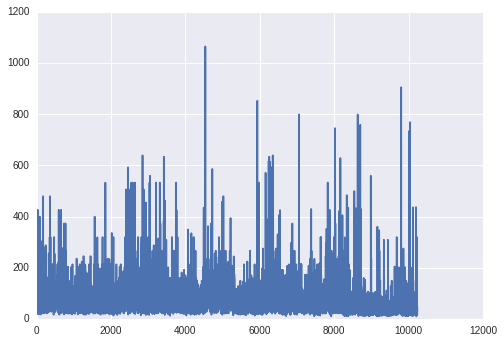

In [109]:
plt.plot(aib.price)
sns.plt.show()

## Creation of data frame for visualization 


In [110]:
# Gathering of all important figures of each neighbourhood in one table and rename them. 
# LONG FORMAT

aib1 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).price.mean()
aib1.rename(columns={'price':'Avg_Price'},inplace=True)

aib1a = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).price.max()
aib1a.rename(columns={'price':'Max_Price'},inplace=True)

aib1b = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).price.min()
aib1b.rename(columns={'price':'Min_Price'},inplace=True)

aib1c = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).price.median()
aib1c.rename(columns={'price':'Median_price'},inplace=True)
aib1a

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,Max_Price
0,Arganzuela,Acacias,Entire home/apt,149.1140
1,Arganzuela,Acacias,Private room,53.2550
2,Arganzuela,Acacias,Shared room,106.5100
3,Arganzuela,Atocha,Entire home/apt,143.7885
4,Arganzuela,Atocha,Private room,74.5570
5,Arganzuela,Chopera,Entire home/apt,145.9187
6,Arganzuela,Chopera,Private room,53.2550
7,Arganzuela,Chopera,Shared room,24.4973
8,Arganzuela,Delicias,Entire home/apt,223.6710
9,Arganzuela,Delicias,Private room,85.2080


In [111]:
# Merge price metrics
# For accuracy reasons  median price is used as measure of average price
# Min price is ignored. Useless
dfs = [aib1a,aib1c]
pr = pd.merge(aib1a,aib1c, how='right',on=['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'])
pr

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,Max_Price,Median_price
0,Arganzuela,Acacias,Entire home/apt,149.1140,69.23150
1,Arganzuela,Acacias,Private room,53.2550,26.62750
2,Arganzuela,Acacias,Shared room,106.5100,35.68085
3,Arganzuela,Atocha,Entire home/apt,143.7885,73.49190
4,Arganzuela,Atocha,Private room,74.5570,31.95300
5,Arganzuela,Chopera,Entire home/apt,145.9187,53.25500
6,Arganzuela,Chopera,Private room,53.2550,24.49730
7,Arganzuela,Chopera,Shared room,24.4973,24.49730
8,Arganzuela,Delicias,Entire home/apt,223.6710,63.90600
9,Arganzuela,Delicias,Private room,85.2080,31.95300


In [112]:
# Number of type of properties in each neighbourhood
aib2 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).room_type.size().reset_index(name='Quantity')
aib2

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,Quantity
0,Arganzuela,Acacias,Entire home/apt,45
1,Arganzuela,Acacias,Private room,53
2,Arganzuela,Acacias,Shared room,6
3,Arganzuela,Atocha,Entire home/apt,9
4,Arganzuela,Atocha,Private room,7
5,Arganzuela,Chopera,Entire home/apt,26
6,Arganzuela,Chopera,Private room,54
7,Arganzuela,Chopera,Shared room,1
8,Arganzuela,Delicias,Entire home/apt,41
9,Arganzuela,Delicias,Private room,51


In [113]:
# Average availability in the next 30 days in each area
aib3 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).availability_30.mean()

aib3

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,availability_30
0,Arganzuela,Acacias,Entire home/apt,8.622222
1,Arganzuela,Acacias,Private room,15.301887
2,Arganzuela,Acacias,Shared room,8.666667
3,Arganzuela,Atocha,Entire home/apt,5.222222
4,Arganzuela,Atocha,Private room,11.142857
5,Arganzuela,Chopera,Entire home/apt,8.884615
6,Arganzuela,Chopera,Private room,17.925926
7,Arganzuela,Chopera,Shared room,7.000000
8,Arganzuela,Delicias,Entire home/apt,8.707317
9,Arganzuela,Delicias,Private room,17.490196


In [114]:
# Average availability in the next 60 days in each area
aib4 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).availability_60.mean()

aib4

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,availability_60
0,Arganzuela,Acacias,Entire home/apt,21.977778
1,Arganzuela,Acacias,Private room,37.773585
2,Arganzuela,Acacias,Shared room,28.166667
3,Arganzuela,Atocha,Entire home/apt,18.777778
4,Arganzuela,Atocha,Private room,25.285714
5,Arganzuela,Chopera,Entire home/apt,25.807692
6,Arganzuela,Chopera,Private room,44.037037
7,Arganzuela,Chopera,Shared room,37.000000
8,Arganzuela,Delicias,Entire home/apt,20.878049
9,Arganzuela,Delicias,Private room,43.274510


In [115]:
# Many hosts do not charge cleaning fee. NaNs are replaced by 0 Eur
aib.cleaning_fee.isnull().sum()


3875

In [116]:
aib['cleaning_fee']=aib['cleaning_fee'].replace(np.nan,0)


In [117]:
# Average cleaning fee by area
aib6 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).cleaning_fee.mean()
aib6

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,cleaning_fee
0,Arganzuela,Acacias,Entire home/apt,13.749361
1,Arganzuela,Acacias,Private room,5.526986
2,Arganzuela,Acacias,Shared room,0.000000
3,Arganzuela,Atocha,Entire home/apt,18.151660
4,Arganzuela,Atocha,Private room,2.950763
5,Arganzuela,Chopera,Entire home/apt,18.488694
6,Arganzuela,Chopera,Private room,5.546341
7,Arganzuela,Chopera,Shared room,0.000000
8,Arganzuela,Delicias,Entire home/apt,14.586973
9,Arganzuela,Delicias,Private room,3.608241


In [118]:
# Number of beds available in each neighbourhood
aib7 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).beds.sum()
aib7

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,beds
0,Arganzuela,Acacias,Entire home/apt,99.0
1,Arganzuela,Acacias,Private room,68.0
2,Arganzuela,Acacias,Shared room,11.0
3,Arganzuela,Atocha,Entire home/apt,26.0
4,Arganzuela,Atocha,Private room,8.0
5,Arganzuela,Chopera,Entire home/apt,57.0
6,Arganzuela,Chopera,Private room,90.0
7,Arganzuela,Chopera,Shared room,2.0
8,Arganzuela,Delicias,Entire home/apt,109.0
9,Arganzuela,Delicias,Private room,66.0


In [119]:
# Total NUmber of guests that may be hosted by area 
aib8 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).accommodates.sum()
aib8

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,accommodates
0,Arganzuela,Acacias,Entire home/apt,161
1,Arganzuela,Acacias,Private room,86
2,Arganzuela,Acacias,Shared room,12
3,Arganzuela,Atocha,Entire home/apt,39
4,Arganzuela,Atocha,Private room,12
5,Arganzuela,Chopera,Entire home/apt,102
6,Arganzuela,Chopera,Private room,109
7,Arganzuela,Chopera,Shared room,2
8,Arganzuela,Delicias,Entire home/apt,187
9,Arganzuela,Delicias,Private room,92


In [120]:
# We add extra column Price per person to figure out average price per person in each neighbourhood
aib['Price_Person_Night'] = aib.price/aib.accommodates
aib9 = aib.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],as_index=False).Price_Person_Night.mean()
aib9

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,Price_Person_Night
0,Arganzuela,Acacias,Entire home/apt,23.182831
1,Arganzuela,Acacias,Private room,20.524946
2,Arganzuela,Acacias,Shared room,23.698475
3,Arganzuela,Atocha,Entire home/apt,22.002205
4,Arganzuela,Atocha,Private room,28.605543
5,Arganzuela,Chopera,Entire home/apt,17.199317
6,Arganzuela,Chopera,Private room,17.334831
7,Arganzuela,Chopera,Shared room,12.248650
8,Arganzuela,Delicias,Entire home/apt,17.335585
9,Arganzuela,Delicias,Private room,20.980033


In [125]:
# Merge previuos dfs to have the expected summary data frame
dfs = [pr,aib2,aib3,aib4,aib7,aib8,aib9]
aibsum = reduce(lambda left,right: pd.merge(left,right, on =['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type']),dfs)
aibsum.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,room_type,Max_Price,Median_price,Quantity,availability_30,availability_60,beds,accommodates,Price_Person_Night
0,Arganzuela,Acacias,Entire home/apt,149.1140,69.23150,45,8.622222,21.977778,99.0,161,23.182831
1,Arganzuela,Acacias,Private room,53.2550,26.62750,53,15.301887,37.773585,68.0,86,20.524946
2,Arganzuela,Acacias,Shared room,106.5100,35.68085,6,8.666667,28.166667,11.0,12,23.698475
3,Arganzuela,Atocha,Entire home/apt,143.7885,73.49190,9,5.222222,18.777778,26.0,39,22.002205
4,Arganzuela,Atocha,Private room,74.5570,31.95300,7,11.142857,25.285714,8.0,12,28.605543


In [128]:
# Aibsum saved as csv. We will use this data frame in R to visualize data in Madrid map
aibsum.to_csv('aibsuma.csv')

In [127]:
# Transform df to wide format in order to have a breakdown of each area figures.
h2 = pd.pivot_table(aibsum,index = ['neighbourhood_group_cleansed','neighbourhood_cleansed','room_type'],values = ['Max_Price','Median_price','Quantity','availability_30',
                                'availability_60','beds','accommodates','Price_Person_Night'])
h2

Max_Price  \
neighbourhood_group_cleansed neighbourhood_cleansed       room_type                    
Arganzuela                   Acacias                      Entire home/apt   149.1140   
                                                          Private room       53.2550   
                                                          Shared room       106.5100   
                             Atocha                       Entire home/apt   143.7885   
                                                          Private room       74.5570   
                             Chopera                      Entire home/apt   145.9187   
                                                          Private room       53.2550   
                                                          Shared room        24.4973   
                             Delicias                     Entire home/apt   223.6710   
                                                          Private room       85.2080   
                                                          Shared room        26.6275   
                             Imperial                     Entire home/apt   117.1610   
                                                          Private room       85.2080   
                             Legazpi                      Entire home/apt   213.0200   
                                                          Private room       52.1899   
                                                          Shared room        20.2369   
                             Palos de Moguer              Entire home/apt   266.2750   
                                                          Private room      158.6999   
                                                          Shared room        12.7812   
Barajas                      Aeropuerto                   Entire home/apt    42.6040   
                                                          Private room       68.1664   
                             Alameda de Osuna             Entire home/apt   101.1845   
                                                          Private room      106.5100   
                             Casco Histórico de Barajas   Entire home/apt   319.5300   
                                                          Private room       47.9295   
                             Corralejos                   Private room       55.3852   
                             Timón                        Entire home/apt   105.4449   
                                                          Private room      436.6910   
Carabanchel                  Abrantes                     Entire home/apt    56.4503   
                                                          Private room       74.5570   
...                                                                              ...   
Usera                        Moscardó                     Private room       34.0832   
                                                          Shared room        17.0416   
                             Orcasitas                    Private room       21.3020   
                             Orcasur                      Private room       85.2080   
                             Pradolongo                   Entire home/apt    90.5335   
                                                          Private room       56.4503   
                             San Fermín                   Entire home/apt    85.2080   
                                                          Private room       31.9530   
                             Zofío                        Entire home/apt    77.7523   
                                                          Private room       26.6275   
Vicálvaro                    Ambroz                       Private room       19.1718   
                             Casco Histórico de Vicálvaro Entire home/apt   200.2388   
                                                          Private room       35.1483   
Villa de Vallecas          